## Importing the necessary libraries of python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing dataset

In [2]:
df = pd.read_csv("C:/Users/Dell laptop/Desktop/Rubix Project 2/Data Sheet for Probability for default Model.csv",header=0)

## Data Preprocessing 

In [3]:
## Seeing the first 5 rows of the dataset to see the number of columns and other information
df.head()

,Company Name,Year,Normalized Rating,Ratings,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),...,Creditor days (days),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets
0,A B I-Showatech (India) Ltd.,2009,1,A1,1481.6,41.85,22.79,10.93,12.90,0.85,...,98.0,36.0,1.15,12.79,1.05,2.20,0.47,1.38,17.63,12.13
1,A B P Pvt. Ltd.,2009,1,A1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A L P Nishikawa Co. Pvt. Ltd.,2009,6,A4,914.1,32.43,9.15,1.60,4.99,0.44,...,NaN,NaN,1.13,13.28,1.34,2.70,3.22,3.15,NaN,NaN
3,A M C L Machinery Ltd.,2009,1,A1,710.8,40.18,23.45,20.33,20.85,0.90,...,36.0,149.0,1.09,24.60,2.99,17.64,0.47,4.48,78.35,14.02
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,1,A1,8195.2,58.66,24.18,-27.62,-7.02,0.40,...,292.0,-199.0,0.24,33.10,0.31,0.35,10.73,9.03,-128.95,-9.40


In [4]:
## To see the datatype of each feature 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11612 entries, 0 to 11611
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Company Name                              11612 non-null  object 
 1   Year                                      11612 non-null  int64  
 2   Normalized Rating                         11612 non-null  int64  
 3   Ratings                                   11612 non-null  object 
 4   Sales                                     8713 non-null   float64
 5   GP Margin %                               8713 non-null   float64
 6   PBDIT Margin %                            8713 non-null   float64
 7   PAT Margin %                              8713 non-null   float64
 8   PBT Percentage %                          8713 non-null   float64
 9   Quick ratio (times)                       9237 non-null   float64
 10  Current ratio (times)             

In [5]:
## To see the additional features of the dataset and detect possible columns that have outliers
df.describe()

,Year,Normalized Rating,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),...,Creditor days (days),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets
count,11612.000000,11612.000000,8.713000e+03,8713.000000,8713.000000,8713.000000,8713.000000,9237.00000,9237.000000,8883.000000,...,8.371000e+03,8.649000e+03,9253.000000,8843.000000,9198.000000,9203.000000,9206.000000,9252.000000,8485.000000,8797.000000
mean,2014.562522,4.307182,2.363198e+04,-100.884967,653.421078,165.793729,593.301312,1.00832,1.572333,4.520306,...,2.434186e+03,2.302926e+02,1.228838,79.394416,35.921548,114.588971,-64.436475,5.491961,-1.456745,2.515880
std,2.914325,1.782055,1.829561e+05,3966.602145,13843.765228,5641.562841,13030.411846,6.01170,6.393121,164.312255,...,6.835346e+04,9.223254e+04,1.342559,587.705421,627.537585,6387.751668,8758.276116,179.160825,318.883837,9.759627
min,2009.000000,1.000000,1.000000e-01,-266100.000000,-16133.330000,-102433.330000,-58666.670000,-0.35000,-0.350000,0.000000,...,0.000000e+00,-5.214258e+06,0.000000,0.000000,0.000000,0.000000,-777306.750000,-2784.260000,-24510.000000,-350.000000
25%,2012.000000,3.000000,1.009100e+03,21.080000,5.640000,0.610000,3.660000,0.38000,0.890000,0.420000,...,3.500000e+01,2.600000e+01,0.500000,8.830000,1.040000,1.610000,0.990000,1.960000,1.720000,0.320000
50%,2015.000000,4.000000,2.709000e+03,34.860000,10.590000,3.140000,7.380000,0.63000,1.160000,1.040000,...,6.800000e+01,7.700000e+01,1.000000,16.990000,2.280000,3.780000,2.820000,2.940000,8.690000,2.530000
75%,2017.000000,5.000000,8.102600e+03,66.610000,18.350000,8.310000,13.370000,0.97000,1.470000,2.040000,...,1.180000e+02,1.480000e+02,1.570000,38.855000,5.650000,9.620000,4.937500,4.380000,17.350000,5.940000
max,2019.000000,8.000000,6.036239e+06,128.470000,632100.000000,419200.000000,624800.000000,481.70000,481.700000,15377.130000,...,5.214294e+06,3.279674e+06,61.710000,31465.920000,35845.180000,609368.000000,302843.150000,16427.000000,7018.180000,115.830000


In [6]:
## Inserting the default column with all zeros first
df.insert(29,'Default',0)

In [7]:
## Seeing all the columns including the new Default column that has been added 
df.head()

,Company Name,Year,Normalized Rating,Ratings,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),...,Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets,Default
0,A B I-Showatech (India) Ltd.,2009,1,A1,1481.6,41.85,22.79,10.93,12.90,0.85,...,36.0,1.15,12.79,1.05,2.20,0.47,1.38,17.63,12.13,0
1,A B P Pvt. Ltd.,2009,1,A1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,A L P Nishikawa Co. Pvt. Ltd.,2009,6,A4,914.1,32.43,9.15,1.60,4.99,0.44,...,NaN,1.13,13.28,1.34,2.70,3.22,3.15,NaN,NaN,0
3,A M C L Machinery Ltd.,2009,1,A1,710.8,40.18,23.45,20.33,20.85,0.90,...,149.0,1.09,24.60,2.99,17.64,0.47,4.48,78.35,14.02,0
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,1,A1,8195.2,58.66,24.18,-27.62,-7.02,0.40,...,-199.0,0.24,33.10,0.31,0.35,10.73,9.03,-128.95,-9.40,0


In [8]:
## Considering the normalised rating column, if the ratings are more than 6 then putting the default value of 1.
## 1 - Company has defaulted, 0 - company has not defaulted
for x in df.iloc[:,2] :
      if x > 6:
        y = df.set_index(df.iloc[:,2]).index.get_loc(x)
        df.iloc[y,29] = 1    

In [9]:
## Seeing the first 20 rows of the dataset and checking if the defualt value is one for ratings 7 or 8
df.head(20)

,Company Name,Year,Normalized Rating,Ratings,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),...,Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets,Default
0,A B I-Showatech (India) Ltd.,2009,1,A1,1481.6,41.85,22.79,10.93,12.90,0.85,...,36.0,1.15,12.79,1.05,2.20,0.47,1.38,17.63,12.13,0
1,A B P Pvt. Ltd.,2009,1,A1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,A L P Nishikawa Co. Pvt. Ltd.,2009,6,A4,914.1,32.43,9.15,1.60,4.99,0.44,...,NaN,1.13,13.28,1.34,2.70,3.22,3.15,NaN,NaN,0
3,A M C L Machinery Ltd.,2009,1,A1,710.8,40.18,23.45,20.33,20.85,0.90,...,149.0,1.09,24.60,2.99,17.64,0.47,4.48,78.35,14.02,0
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,1,A1,8195.2,58.66,24.18,-27.62,-7.02,0.40,...,-199.0,0.24,33.10,0.31,0.35,10.73,9.03,-128.95,-9.40,0
5,A V T Mccormick Ingredients Pvt. Ltd.,2009,3,A2,1660.5,32.32,19.72,6.19,19.09,0.45,...,254.0,1.41,19.53,4.07,18.13,1.87,3.03,17.72,5.92,0
6,A V T Natural Products Ltd.,2009,3,A2,967.9,44.54,27.92,11.73,25.37,0.68,...,261.0,0.97,9.81,1.86,3.43,1.42,2.20,15.87,7.12,0
7,Aarti Drugs Ltd.,2009,3,A2,4096.9,40.78,14.50,5.65,11.70,0.74,...,97.0,1.06,36.49,1.53,2.28,2.99,3.22,13.17,3.86,0
8,Aarti International Ltd.,2009,3,A2,3572.6,25.21,18.59,-1.51,9.95,0.42,...,264.0,0.65,29.75,0.83,1.22,5.28,3.38,-4.66,-1.40,0
9,Aarti Steels Ltd.,2009,3,A2,8682.9,36.80,12.83,4.82,8.99,0.92,...,103.0,1.42,35.54,1.80,2.75,2.61,2.54,12.21,4.49,0


In [10]:
## Retaining only those rows of Sales where there are no NA values
df2 = df[df['Sales'].notna()]

In [11]:
## Checking the percentage of all NA values present in the dataset
(df2.isna().sum())/df2.shape[0]*100

Company Name                                 0.000000
Year                                         0.000000
Normalized Rating                            0.000000
Ratings                                      0.000000
Sales                                        0.000000
GP Margin %                                  0.000000
PBDIT Margin %                               0.000000
PAT Margin %                                 0.000000
PBT Percentage %                             0.000000
Quick ratio (times)                          0.137725
Current ratio (times)                        0.137725
Debt to equity ratio (times)                 3.971078
Interest cover (times)                      11.947664
Raw material cycle (days)                   25.616894
WIP cycle (days)                            39.837025
Finished goods cycle (days)                 25.479169
Inventory Days                              13.829909
Debtor days (days)                           4.613795
Gross working capital cycle 

### Deleting those columns which have more than 20% of NA values

In [12]:
del df2['WIP cycle (days)']

In [13]:
del df2['Raw material cycle (days)']

In [14]:
del df2['Finished goods cycle (days)']

### Deleting normalised rating and ratings as dependent variable is formed.

In [15]:
del df2['Normalized Rating']

In [16]:
del df2['Ratings']

In [17]:
## Checking the columns again after deleting the above columns.
df2.head()

,Company Name,Year,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),...,Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets,Default
0,A B I-Showatech (India) Ltd.,2009,1481.6,41.85,22.79,10.93,12.90,0.85,1.80,0.17,...,36.0,1.15,12.79,1.05,2.20,0.47,1.38,17.63,12.13,0
2,A L P Nishikawa Co. Pvt. Ltd.,2009,914.1,32.43,9.15,1.60,4.99,0.44,0.63,1.05,...,NaN,1.13,13.28,1.34,2.70,3.22,3.15,NaN,NaN,0
3,A M C L Machinery Ltd.,2009,710.8,40.18,23.45,20.33,20.85,0.90,1.32,0.54,...,149.0,1.09,24.60,2.99,17.64,0.47,4.48,78.35,14.02,0
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,8195.2,58.66,24.18,-27.62,-7.02,0.40,0.40,5.54,...,-199.0,0.24,33.10,0.31,0.35,10.73,9.03,-128.95,-9.40,0
5,A V T Mccormick Ingredients Pvt. Ltd.,2009,1660.5,32.32,19.72,6.19,19.09,0.45,1.34,1.57,...,254.0,1.41,19.53,4.07,18.13,1.87,3.03,17.72,5.92,0


In [18]:
## Checking the percentage of NA values again
(df2.isna().sum())/df2.shape[0]*100

Company Name                                 0.000000
Year                                         0.000000
Sales                                        0.000000
GP Margin %                                  0.000000
PBDIT Margin %                               0.000000
PAT Margin %                                 0.000000
PBT Percentage %                             0.000000
Quick ratio (times)                          0.137725
Current ratio (times)                        0.137725
Debt to equity ratio (times)                 3.971078
Interest cover (times)                      11.947664
Inventory Days                              13.829909
Debtor days (days)                           4.613795
Gross working capital cycle (days)           4.338345
Creditor days (days)                         5.336853
Net working capital cycle (days)             3.948123
Total Income/Total asset                     0.000000
Total Income/ Compansation to employees      1.182142
Sales / GFA                 

In [19]:
## COnverting sales to log to avoid skewness.
df2.Sales = np.log(1+df2.Sales)

C:\Users\Dell laptop\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


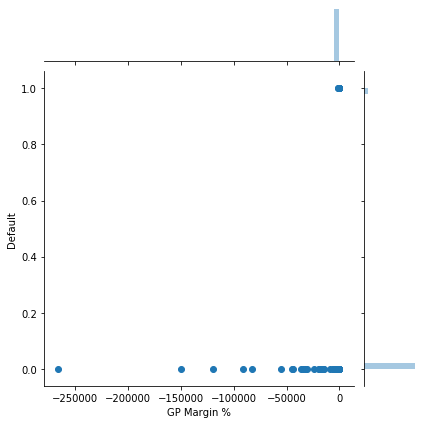

In [20]:
## Plotting scatter plot graph for all the columns to see the possible outliers.
sns.jointplot(x='GP Margin %', y='Default', data=df2)

### Capping all the outlier values of each column to either the 5th percentile or the 95th percentile of the respective columns.

In [21]:
print(df2['Sales'].quantile(0.05))
print(df2['Sales'].quantile(0.95))

5.467469227902784
10.944037156954543


In [22]:
df2['Sales'] = np.where(df2['Sales'] <5.467, 5.467,df2['Sales'])
df2['Sales'] = np.where(df2['Sales'] >10.944, 10.944,df2['Sales'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
print(df2['GP Margin %'].quantile(0.05))
print(df2['GP Margin %'].quantile(0.95))

5.1240000000000006
98.62


In [24]:
df2['GP Margin %'] = np.where(df2['GP Margin %'] <5.12, 5.12,df2['GP Margin %'])
df2['GP Margin %'] = np.where(df2['GP Margin %'] >98.62, 98.62,df2['GP Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
print(df2['PBDIT Margin %'].quantile(0.05))
print(df2['PBDIT Margin %'].quantile(0.95))

-0.8919999999999993
54.835999999999956


In [26]:
df2['PBDIT Margin %'] = np.where(df2['PBDIT Margin %'] <-0.892, -0.892,df2['PBDIT Margin %'])
df2['PBDIT Margin %'] = np.where(df2['PBDIT Margin %'] >54.836, 54.836,df2['PBDIT Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
print(df2['PAT Margin %'].quantile(0.05))
print(df2['PAT Margin %'].quantile(0.95))

-23.971999999999998
24.663999999999998


In [28]:
df2['PAT Margin %'] = np.where(df2['PAT Margin %'] <-23.972, -23.972,df2['PAT Margin %'])
df2['PAT Margin %'] = np.where(df2['PAT Margin %'] >24.664, 24.664,df2['PAT Margin %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
print(df2['PBT Percentage %'].quantile(0.05))
print(df2['PBT Percentage %'].quantile(0.95))

-7.531999999999999
39.53


In [30]:
df2['PBT Percentage %'] = np.where(df2['PBT Percentage %'] <-7.532, -7.532,df2['PBT Percentage %'])
df2['PBT Percentage %'] = np.where(df2['PBT Percentage %'] >39.53, 39.53,df2['PBT Percentage %'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
print(df2['Quick ratio (times)'].quantile(0.05))
print(df2['Quick ratio (times)'].quantile(0.95))

0.12
2.04


In [32]:
df2['Quick ratio (times)'] = np.where(df2['Quick ratio (times)'] <0.12, 0.12,df2['Quick ratio (times)'])
df2['Quick ratio (times)'] = np.where(df2['Quick ratio (times)'] >2.04, 2.04,df2['Quick ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
print(df2['Current ratio (times)'].quantile(0.05))
print(df2['Current ratio (times)'].quantile(0.95))

0.41
2.83


In [34]:
df2['Current ratio (times)'] = np.where(df2['Current ratio (times)'] <0.41, 0.41,df2['Current ratio (times)'])
df2['Current ratio (times)'] = np.where(df2['Current ratio (times)'] >2.83, 2.83,df2['Current ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
print(df2['Debt to equity ratio (times)'].quantile(0.05))
print(df2['Debt to equity ratio (times)'].quantile(0.95))

0.01
6.236999999999998


In [36]:
df2['Debt to equity ratio (times)'] = np.where(df2['Debt to equity ratio (times)'] <0.01, 0.01,df2['Debt to equity ratio (times)'])
df2['Debt to equity ratio (times)'] = np.where(df2['Debt to equity ratio (times)'] >6.237, 6.237,df2['Debt to equity ratio (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
print(df2['Interest cover (times)'].quantile(0.05))
print(df2['Interest cover (times)'].quantile(0.95))

0.5755000000000001
57.811499999999995


In [38]:
df2['Interest cover (times)'] = np.where(df2['Interest cover (times)'] <0.575, 0.575,df2['Interest cover (times)'])
df2['Interest cover (times)'] = np.where(df2['Interest cover (times)'] >57.812, 57.812,df2['Interest cover (times)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
print(df2['Inventory Days'].quantile(0.05))
print(df2['Inventory Days'].quantile(0.95))

15.0
503.64999999999964


In [40]:
df2['Inventory Days'] = np.where(df2['Inventory Days'] <15.0, 15.0,df2['Inventory Days'])
df2['Inventory Days'] = np.where(df2['Inventory Days'] >503.649, 503.649,df2['Inventory Days'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
print(df2['Debtor days (days)'].quantile(0.05))
print(df2['Debtor days (days)'].quantile(0.95))

8.0
223.0


In [42]:
df2['Debtor days (days)'] = np.where(df2['Debtor days (days)'] <8.0, 8.0,df2['Debtor days (days)'])
df2['Debtor days (days)'] = np.where(df2['Debtor days (days)'] >223.0, 223.0,df2['Debtor days (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
print(df2['Gross working capital cycle (days)'].quantile(0.05))
print(df2['Gross working capital cycle (days)'].quantile(0.95))

37.0
748.0


In [44]:
df2['Gross working capital cycle (days)'] = np.where(df2['Gross working capital cycle (days)'] <37.0, 37.0,df2['Gross working capital cycle (days)'])
df2['Gross working capital cycle (days)'] = np.where(df2['Gross working capital cycle (days)'] >748.0, 748.0,df2['Gross working capital cycle (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
print(df2['Creditor days (days)'].quantile(0.05))
print(df2['Creditor days (days)'].quantile(0.95))

8.0
534.5999999999985


In [46]:
df2['Creditor days (days)'] = np.where(df2['Creditor days (days)'] <8.0, 8.0,df2['Creditor days (days)'])
df2['Creditor days (days)'] = np.where(df2['Creditor days (days)'] >534.56, 534.56,df2['Creditor days (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
print(df2['Net working capital cycle (days)'].quantile(0.05))
print(df2['Net working capital cycle (days)'].quantile(0.95))

-185.0
493.1999999999989


In [48]:
df2['Net working capital cycle (days)'] = np.where(df2['Net working capital cycle (days)'] <-185.0, -185.0,df2['Net working capital cycle (days)'])
df2['Net working capital cycle (days)'] = np.where(df2['Net working capital cycle (days)'] >439.12, 439.12,df2['Net working capital cycle (days)'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
print(df2['Total Income/Total asset'].quantile(0.05))
print(df2['Total Income/Total asset'].quantile(0.95))

0.12
3.35


In [50]:
df2['Total Income/Total asset'] = np.where(df2['Total Income/Total asset'] <0.12, 0.12,df2['Total Income/Total asset'])
df2['Total Income/Total asset'] = np.where(df2['Total Income/Total asset'] >3.35, 3.35,df2['Total Income/Total asset'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
print(df2['Total Income/ Compansation to employees'].quantile(0.05))
print(df2['Total Income/ Compansation to employees'].quantile(0.95))

2.7545
212.09349999999986


In [52]:
df2['Total Income/ Compansation to employees'] = np.where(df2['Total Income/ Compansation to employees'] <2.7545, 2.7545,df2['Total Income/ Compansation to employees'])
df2['Total Income/ Compansation to employees'] = np.where(df2['Total Income/ Compansation to employees'] >212.094, 212.094,df2['Total Income/ Compansation to employees'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
print(df2['Sales / GFA'].quantile(0.05))
print(df2['Sales / GFA'].quantile(0.95))

0.27
42.55700000000001


In [54]:
df2['Sales / GFA'] = np.where(df2['Sales / GFA'] <0.27, 0.27,df2['Sales / GFA'])
df2['Sales / GFA'] = np.where(df2['Sales / GFA'] >42.557, 42.557,df2['Sales / GFA'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
print(df2['Sales / net fixed Assets'].quantile(0.05))
print(df2['Sales / net fixed Assets'].quantile(0.95))

0.34
76.53600000000004


In [56]:
df2['Sales / net fixed Assets'] = np.where(df2['Sales / net fixed Assets'] <0.34, 0.34,df2['Sales / net fixed Assets'])
df2['Sales / net fixed Assets'] = np.where(df2['Sales / net fixed Assets'] >76.536, 76.536,df2['Sales / net fixed Assets'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
print(df2['Debt/EBIT'].quantile(0.05))
print(df2['Debt/EBIT'].quantile(0.95))

0.0
13.73


In [58]:
df2['Debt/EBIT'] = np.where(df2['Debt/EBIT'] <0.0, 0.0,df2['Debt/EBIT'])
df2['Debt/EBIT'] = np.where(df2['Debt/EBIT'] >13.73, 13.73,df2['Debt/EBIT'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
print(df2['Total Outside liability/ Total Net Worth'].quantile(0.05))
print(df2['Total Outside liability/ Total Net Worth'].quantile(0.95))

1.16
10.97


In [60]:
df2['Total Outside liability/ Total Net Worth'] = np.where(df2['Total Outside liability/ Total Net Worth'] <1.16, 1.16,df2['Total Outside liability/ Total Net Worth'])
df2['Total Outside liability/ Total Net Worth'] = np.where(df2['Total Outside liability/ Total Net Worth'] >10.97, 10.97,df2['Total Outside liability/ Total Net Worth'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
print(df2['Return on net worth'].quantile(0.05))
print(df2['Return on net worth'].quantile(0.95))

-37.534
36.45399999999998


In [62]:
df2['Return on net worth'] = np.where(df2['Return on net worth'] <-37.534, -37.534,df2['Return on net worth'])
df2['Return on net worth'] = np.where(df2['Return on net worth'] >36.454, 36.454,df2['Return on net worth'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
print(df2['Return on total assets'].quantile(0.05))
print(df2['Return on total assets'].quantile(0.95))

-9.62
14.013999999999996


In [64]:
df2['Return on total assets'] = np.where(df2['Return on total assets'] <-9.62, -9.62,df2['Return on total assets'])
df2['Return on total assets'] = np.where(df2['Return on total assets'] >14.014, 14.014,df2['Return on total assets'])

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Imputing the missing values with KNN algorithm for all the columns that has missing values

In [65]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df2_filled = imputer.fit_transform(df2[['Quick ratio (times)']])
df2['Quick ratio (times)']=df2_filled

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
imputer2 = KNNImputer(n_neighbors=2)
df2_filled2 = imputer2.fit_transform(df2[['Current ratio (times)']])
df2['Current ratio (times)']=df2_filled2

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
imputer3 = KNNImputer(n_neighbors=2)
df2_filled3 = imputer3.fit_transform(df2[['Debt to equity ratio (times)']])
df2['Debt to equity ratio (times)']=df2_filled3

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
imputer4 = KNNImputer(n_neighbors=2)
df2_filled4 = imputer4.fit_transform(df2[['Interest cover (times)']])
df2['Interest cover (times)']=df2_filled4

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
imputer5 = KNNImputer(n_neighbors=2)
df2_filled5 = imputer5.fit_transform(df2[['Inventory Days']])
df2['Inventory Days']=df2_filled5

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
imputer6 = KNNImputer(n_neighbors=2)
df2_filled6 = imputer6.fit_transform(df2[['Debtor days (days)']])
df2['Debtor days (days)']=df2_filled6

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
imputer7 = KNNImputer(n_neighbors=2)
df2_filled7 = imputer7.fit_transform(df2[['Gross working capital cycle (days)']])
df2['Gross working capital cycle (days)']=df2_filled7

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
imputer8 = KNNImputer(n_neighbors=2)
df2_filled8 = imputer8.fit_transform(df2[['Creditor days (days)']])
df2['Creditor days (days)']=df2_filled8

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
imputer9 = KNNImputer(n_neighbors=2)
df2_filled9 = imputer9.fit_transform(df2[['Net working capital cycle (days)']])
df2['Net working capital cycle (days)']=df2_filled9

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
imputer10 = KNNImputer(n_neighbors=2)
df2_filled10 = imputer10.fit_transform(df2[['Total Income/ Compansation to employees']])
df2['Total Income/ Compansation to employees']=df2_filled10

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
imputer11 = KNNImputer(n_neighbors=2)
df2_filled11 = imputer11.fit_transform(df2[['Sales / GFA']])
df2['Sales / GFA']=df2_filled11

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
imputer12 = KNNImputer(n_neighbors=2)
df2_filled12 = imputer12.fit_transform(df2[['Sales / net fixed Assets']])
df2['Sales / net fixed Assets']=df2_filled12

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
imputer13 = KNNImputer(n_neighbors=2)
df2_filled13 = imputer13.fit_transform(df2[['Debt/EBIT']])
df2['Debt/EBIT']=df2_filled13

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
imputer14 = KNNImputer(n_neighbors=2)
df2_filled14 = imputer14.fit_transform(df2[['Return on net worth']])
df2['Return on net worth']=df2_filled14

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
imputer15 = KNNImputer(n_neighbors=2)
df2_filled15 = imputer15.fit_transform(df2[['Return on total assets']])
df2['Return on total assets']=df2_filled15

C:\Users\Dell laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
## Now checking the percentage to see if NA values were replaced successfully.
(df2.isna().sum())/df2.shape[0]*100

Company Name                                0.0
Year                                        0.0
Sales                                       0.0
GP Margin %                                 0.0
PBDIT Margin %                              0.0
PAT Margin %                                0.0
PBT Percentage %                            0.0
Quick ratio (times)                         0.0
Current ratio (times)                       0.0
Debt to equity ratio (times)                0.0
Interest cover (times)                      0.0
Inventory Days                              0.0
Debtor days (days)                          0.0
Gross working capital cycle (days)          0.0
Creditor days (days)                        0.0
Net working capital cycle (days)            0.0
Total Income/Total asset                    0.0
Total Income/ Compansation to employees     0.0
Sales / GFA                                 0.0
Sales / net fixed Assets                    0.0
Debt/EBIT                               

In [81]:
## Checking the number of rows and columns
df2.shape

(8713, 25)

### Checking the correlation matrix

In [82]:
pd.set_option('display.max_columns', None)
df2.corr()

,Year,Sales,GP Margin %,PBDIT Margin %,PAT Margin %,PBT Percentage %,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),Interest cover (times),Inventory Days,Debtor days (days),Gross working capital cycle (days),Creditor days (days),Net working capital cycle (days),Total Income/Total asset,Total Income/ Compansation to employees,Sales / GFA,Sales / net fixed Assets,Debt/EBIT,Total Outside liability/ Total Net Worth,Return on net worth,Return on total assets,Default
Year,1.000000,0.103758,0.005742,-0.018117,-0.031665,-0.034088,0.043023,0.059818,-0.050102,0.049563,-0.013585,0.037590,-0.000990,0.059569,-0.045062,0.011207,-0.064165,0.029754,0.035449,-0.061552,-0.041371,-0.030018,-0.014183,0.008687
Sales,0.103758,1.000000,0.087705,-0.078194,0.141623,-0.006552,-0.005267,-0.045629,-0.112528,0.146072,-0.117804,-0.192550,-0.180909,-0.167109,-0.063997,0.167796,0.129031,0.094202,0.066564,-0.105101,-0.027327,0.159277,0.192525,-0.088892
GP Margin %,0.005742,0.087705,1.000000,0.212426,0.100307,0.193527,0.161870,0.047829,-0.029299,0.038979,0.143903,0.042809,0.063269,0.077925,-0.006695,0.023456,0.131383,0.315193,0.314919,0.005008,0.012989,0.060381,0.074164,-0.050572
PBDIT Margin %,-0.018117,-0.078194,0.212426,1.000000,0.519429,0.916186,0.144180,0.073092,-0.015989,0.144599,0.250586,0.160380,0.263666,0.302712,0.033967,-0.536533,-0.233054,-0.267279,-0.255886,0.018922,-0.080788,0.157640,0.246608,-0.052280
PAT Margin %,-0.031665,0.141623,0.100307,0.519429,1.000000,0.720987,0.322461,0.323103,-0.341643,0.335894,-0.038660,-0.053817,-0.048385,-0.043659,-0.019665,-0.026529,-0.090661,-0.026410,-0.025661,-0.253476,-0.257246,0.611742,0.747581,-0.290751
PBT Percentage %,-0.034088,-0.006552,0.193527,0.916186,0.720987,1.000000,0.194368,0.160508,-0.092648,0.197503,0.198898,0.110798,0.208459,0.202503,0.052944,-0.403236,-0.176616,-0.170840,-0.164046,-0.044427,-0.114089,0.335764,0.445352,-0.132014
Quick ratio (times),0.043023,-0.005267,0.161870,0.144180,0.322461,0.194368,1.000000,0.797940,-0.346133,0.403157,-0.157928,0.285848,-0.043828,0.057128,-0.066690,0.014123,-0.009944,0.084314,0.099990,-0.254765,-0.297624,0.186021,0.336424,-0.117832
Current ratio (times),0.059818,-0.045629,0.047829,0.073092,0.323103,0.160508,0.797940,1.000000,-0.326251,0.369629,0.022288,0.111503,0.047939,-0.075191,0.129586,0.068151,0.020179,0.082774,0.097034,-0.212629,-0.304387,0.194480,0.354330,-0.137236
Debt to equity ratio (times),-0.050102,-0.112528,-0.029299,-0.015989,-0.341643,-0.092648,-0.346133,-0.326251,1.000000,-0.316244,0.089021,-0.034287,0.072003,0.005532,0.064205,-0.058871,0.129587,0.009703,-0.006945,0.579434,0.862367,-0.305783,-0.393746,0.167416
Interest cover (times),0.049563,0.146072,0.038979,0.144599,0.335894,0.197503,0.403157,0.369629,-0.316244,1.000000,-0.029465,-0.012136,-0.041068,0.040855,-0.067142,-0.026450,-0.124234,-0.021860,-0.011397,-0.337332,-0.235198,0.233127,0.403550,-0.075467


In [83]:
## Deleting PBT Percentage % because the correlation coefficient with PAT was around 0.8
del df2['PBT Percentage %']

In [84]:
## Deleting PAT Margin % because the correlation coefficient with PBDIT was around 0.8.  
del df2['PAT Margin %']

In [85]:
## Deleting Gross working capital column because the correlation coefficient with Inventory Days was around 0.8
del df2['Gross working capital cycle (days)']

In [86]:
## Deleting Inventory, creditor, debtor days because the variable Net working capital gives all the required information of these 3 variables.
del df2['Inventory Days']

In [87]:
del df2['Debtor days (days)']

In [88]:
del df2['Creditor days (days)']

In [89]:
## Deleting Debt/EBIT because it wasnt coming significant in the first run
del df2['Debt/EBIT']

In [90]:
## Total outside liability/Total Net worth had correlation of more than 0.8 with Debt to equity ratio so removed this vairable due to business knowledge.
del df2['Total Outside liability/ Total Net Worth']

In [91]:
## Quick ratio and current ratio had correlation of around 0.8 so removed quick ratio as its coefficinet with Deafult variable is less than current ratio.
del df2['Quick ratio (times)']

In [92]:
## Deleting Sales/GFA because it was correlated with Sales net fixed assets. 
del df2['Sales / GFA']

In [93]:
## Deleting Sales/net fixed assets because it wasnt coming significant in the first run
del df2['Sales / net fixed Assets']

In [94]:
## Deleting Return on net worth as wasnt coming that significant
del df2['Return on net worth']

In [95]:
## Deleting Total Income/ Total asset as wasnt coming that significant.
del df2['Total Income/Total asset']

In [96]:
## Deleting Sales as wasnt coming that significant
del df2['Sales']

In [97]:
## Checking correlation of all variables again to see if the variables are still correlated.
pd.set_option('display.max_columns', None)
df2.corr()

,Year,GP Margin %,PBDIT Margin %,Current ratio (times),Debt to equity ratio (times),Interest cover (times),Net working capital cycle (days),Total Income/ Compansation to employees,Return on total assets,Default
Year,1.000000,0.005742,-0.018117,0.059818,-0.050102,0.049563,-0.045062,-0.064165,-0.014183,0.008687
GP Margin %,0.005742,1.000000,0.212426,0.047829,-0.029299,0.038979,-0.006695,0.131383,0.074164,-0.050572
PBDIT Margin %,-0.018117,0.212426,1.000000,0.073092,-0.015989,0.144599,0.033967,-0.233054,0.246608,-0.052280
Current ratio (times),0.059818,0.047829,0.073092,1.000000,-0.326251,0.369629,0.129586,0.020179,0.354330,-0.137236
Debt to equity ratio (times),-0.050102,-0.029299,-0.015989,-0.326251,1.000000,-0.316244,0.064205,0.129587,-0.393746,0.167416
Interest cover (times),0.049563,0.038979,0.144599,0.369629,-0.316244,1.000000,-0.067142,-0.124234,0.403550,-0.075467
Net working capital cycle (days),-0.045062,-0.006695,0.033967,0.129586,0.064205,-0.067142,1.000000,-0.035208,-0.082005,0.092807
Total Income/ Compansation to employees,-0.064165,0.131383,-0.233054,0.020179,0.129587,-0.124234,-0.035208,1.000000,-0.027248,-0.021032
Return on total assets,-0.014183,0.074164,0.246608,0.354330,-0.393746,0.403550,-0.082005,-0.027248,1.000000,-0.289466
Default,0.008687,-0.050572,-0.052280,-0.137236,0.167416,-0.075467,0.092807,-0.021032,-0.289466,1.000000


In [98]:
## Deleting because wasnt coming that significant.
del df2['Total Income/ Compansation to employees']

In [99]:
## Deleting because wasnt coming that significant.
del df2['GP Margin %']

In [100]:
## Checking the final rows and columns of the dataframe.
df2.shape

(8713, 9)

In [101]:
df2.head()

,Company Name,Year,PBDIT Margin %,Current ratio (times),Debt to equity ratio (times),Interest cover (times),Net working capital cycle (days),Return on total assets,Default
0,A B I-Showatech (India) Ltd.,2009,22.79,1.80,0.17,8.710000,36.000000,12.130000,0
2,A L P Nishikawa Co. Pvt. Ltd.,2009,9.15,0.63,1.05,1.370000,95.266034,2.940363,0
3,A M C L Machinery Ltd.,2009,23.45,1.32,0.54,57.812000,149.000000,14.014000,0
4,A T C Telecom Infrastructure Pvt. Ltd.,2009,24.18,0.41,5.54,7.396642,-185.000000,-9.400000,0
5,A V T Mccormick Ingredients Pvt. Ltd.,2009,19.72,1.34,1.57,3.830000,254.000000,5.920000,0


# LOGISTIC REGRESSION MODEL

In [102]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [103]:
print(X)

[[ 2.27900000e+01  1.80000000e+00  1.70000000e-01  8.71000000e+00
   3.60000000e+01  1.21300000e+01]
 [ 9.15000000e+00  6.30000000e-01  1.05000000e+00  1.37000000e+00
   9.52660342e+01  2.94036340e+00]
 [ 2.34500000e+01  1.32000000e+00  5.40000000e-01  5.78120000e+01
   1.49000000e+02  1.40140000e+01]
 ...
 [ 5.46000000e+00  1.33000000e+00  1.20000000e-01  1.40400000e+01
   5.90000000e+01  1.30900000e+01]
 [ 3.13100000e+01  2.83000000e+00  1.00000000e-02  5.78120000e+01
  -1.85000000e+02  1.28600000e+01]
 [ 1.90700000e+01  4.20000000e-01  2.33000000e+00  5.75000000e-01
  -7.40000000e+01 -1.74000000e+00]]


In [104]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [105]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
## Importing LogisticRegression class from sklearn library and fitting it on the training set.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [107]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [108]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1600    5]
 [ 131    7]]


0.9219736087205966

In [109]:
## Printing the coefficients of Logistic regression model.
print(classifier.coef_)

[[ 0.01448085 -0.3014095   0.11824968 -1.05064753  0.34560822 -1.1194293 ]]


In [110]:
## Analysing the importance of each feature.
importance = classifier.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01448
Feature: 1, Score: -0.30141
Feature: 2, Score: 0.11825
Feature: 3, Score: -1.05065
Feature: 4, Score: 0.34561
Feature: 5, Score: -1.11943


In [111]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.07 %
Standard Deviation: 0.22 %


In [112]:
## Analysing the accuracy by ridge and lasso regression to avoid overfitting of model.
classifier2 = LogisticRegression(C=0.01,penalty='l1', solver='liblinear')
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
print("Non zero weights : ",np.count_nonzero(classifier.coef_))

Non zero weights :  6


In [113]:
## Importing the confusion matrix and accuracy score.
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[1605    0]
 [ 138    0]]


0.9208261617900172

# KERNEL SVM MODEL

In [114]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [115]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [116]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
## Importing SVC class from sklearn library and fitting it on the training set.
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [118]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [119]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1600    5]
 [ 129    9]]


0.9231210556511761

In [120]:
## Printing the support vectors.
print(classifier.support_vectors_)

[[ 3.00611836e+00 -1.46150930e+00  2.85139988e+00 -5.09001361e-01
   2.60074382e+00 -9.13440444e-01]
 [-1.41788476e-01 -4.54258387e-01 -6.12109714e-01 -4.35278217e-01
  -1.33782431e-01 -9.29781322e-02]
 [-4.50800998e-01 -3.51826091e-01  2.82602618e+00 -5.25512273e-01
   4.02369574e-01 -8.39856380e-01]
 ...
 [-1.07105987e+00 -4.71330436e-01  2.97636533e+00 -1.64467053e-03
   6.59118421e-01 -2.31705646e+00]
 [-1.14343581e+00 -1.46150930e+00 -4.93682013e-03 -1.64467053e-03
  -3.67876968e-01 -2.31705646e+00]
 [-1.06808143e+00 -6.24978881e-01 -1.55383175e-01 -1.64467053e-03
  -7.60551675e-01 -8.06743551e-01]]


In [121]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.20 %
Standard Deviation: 0.25 %


# NAIVE BAYES THEOREM MODEL

In [122]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [123]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [124]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
## Importing GaussianNB class from sklearn library and fitting it on the training set.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [126]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


In [127]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1434  171]
 [  77   61]]


0.8577165806081469

In [128]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.60 %
Standard Deviation: 1.17 %


# DECISION TREE MODEL

In [129]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [130]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [131]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
## Importing DecisionTreeClassifier class from sklearn library and fitting it on the training set.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [133]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [134]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1502  103]
 [ 104   34]]


0.8812392426850258

In [135]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.65 %
Standard Deviation: 0.76 %


# RANDOM FOREST MODEL

In [136]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [137]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
## Standardizing all the values so that no column dominates the other columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
## Importing RandomForestCLassifier class from sklearn library and fitting it on the training set.
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [140]:
## Predicting the results by using the X_test data.
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [141]:
## Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1588   17]
 [ 119   19]]


0.9219736087205966

In [142]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.75 %
Standard Deviation: 0.46 %


In [143]:
## Feature importance
importances = classifier.feature_importances_

Feature ranking:
1. feature 5 (0.220736)
2. feature 4 (0.175734)
3. feature 2 (0.164963)
4. feature 0 (0.157855)
5. feature 3 (0.142466)
6. feature 1 (0.138247)


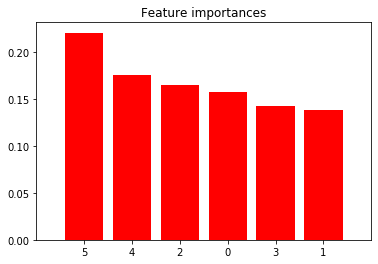

In [144]:
## PLotting the histogram for all the features as per their importance.
std = np.std([classifier.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# XG BOOST

In [145]:
## X contains all independent variables right from PBDIT margin to Return on assets.
## Y contains the dependent variable - default.
X = df2.iloc[:, 2:8].values
y = df2.iloc[:, -1].values

In [146]:
## Importing the train and test function to split 80% into training set and rest 20% into testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [147]:
## Since xgboost doesnt need standardisation, directly Importing XBGCLassifier class from sklearn library and fitting it on the training set.
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
## Predicting the results and Importing the confusion matrix and accuracy score to check the accuracy of the predictions.
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1579   26]
 [ 116   22]]


0.9185312679288583

In [149]:
## Analysing the accuracy by using cross validation method.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.65 %
Standard Deviation: 0.48 %
